## Задание 2.
(10 баллов) Реализуйте базовые функции autograd. Можете вдохновиться видео от Andrej Karpathy. Напишите класс, аналогичный предоставленному классу 'Element', который реализует основные операции autograd: сложение, умножение и активацию ReLU. Класс должен обрабатывать скалярные объекты и правильно вычислять градиенты для этих операций посредством автоматического дифференцирования. Плюсом будет набор предоставленных тестов, оценивающих правильность вычислений. Большим плюсом будет, если тесты будут   написаны с помощью unittest. Можно использовать только чистый torch (без использования autograd и torch.nn). За каждую нереализованную операцию будет вычитаться 3 балла.
	Пример: 
        ```
        
        a = Element(2),
        b = Element(-3), 
        c = Element(10), 
        d = a + b * c, 
        e = d.relu(), 
        e.backward(), 
        print(a, b, c, d, e), 
        Output:  Element(data=2, grad=0)  Element(data=-3, grad=10)  Element(data=10, grad=-3)  Element(data=-28, grad=1)  Element(data=0, grad=1)
        ```

In [2]:
from collections import deque

class Element:
	"simple element with autograd support"
	def __init__(self, data, _children=[], _op=''):
		self.data = data
		self.grad = 0
		self._backward = lambda: None
		self._prev = _children
		self._op = _op

	def __repr__(self):
		return f" Element(data={self.data}, grad={self.grad})"

	def __add__(self, other):
		out = Element(self.data + other.data, [self, other], "+")
		def _backward():
			self.grad += out.grad
			other.grad += out.grad
		out._backward = _backward
		return out

	def __mul__(self, other):
		out = Element(self.data * other.data, [self, other], "*")
		def _backward():
			self.grad += out.grad * other.data
			other.grad += out.grad * self.data
		out._backward = _backward
		return out

	def relu(self):
		out = Element(self.data, [self], "relu")
		def _backward():
			if out.data >= 0:
				self.grad += 1
			else:
				self.grad += 0
		out._backward = _backward
		if self.data < 0:
			out.data = 0
		return out
			
	def backward(self):
		"reverse grad calculation using Breadth-first search"
		stk = deque()
		self.grad = 1 
		stk.append([self])
		while len(stk) > 0:
			nodes = stk.pop()
			for node in nodes:
				node._backward()
				stk.append(node._prev)
		return  

In [3]:
a = Element(2)
b = Element(-3)
c = Element(10)

d = a+b*c

e = d.relu()
e.backward()
elements = [a,b,c,d,e]
for i in elements:
    print(i)

 Element(data=2, grad=1)
 Element(data=-3, grad=10)
 Element(data=10, grad=-3)
 Element(data=-28, grad=1)
 Element(data=0, grad=1)


In [4]:
t1 = Element(10)
t2 = Element(-15)
t3 = t1 + t2 + t1
t3.backward()
elements = [t1,t2,t3]
for i in elements:
    print(i)

 Element(data=10, grad=2)
 Element(data=-15, grad=1)
 Element(data=5, grad=1)


In [5]:
#множественное использование переменных
q1 = Element(4)
q2 = Element(2)
q3 = q1+q2
q4 = q1*q2
q5 = (q3 * q4).relu()

q5.backward()
elements = [q1,q2,q3,q4,q5]
for i in elements:
    print(i)

 Element(data=4, grad=20)
 Element(data=2, grad=32)
 Element(data=6, grad=8)
 Element(data=8, grad=6)
 Element(data=48, grad=1)


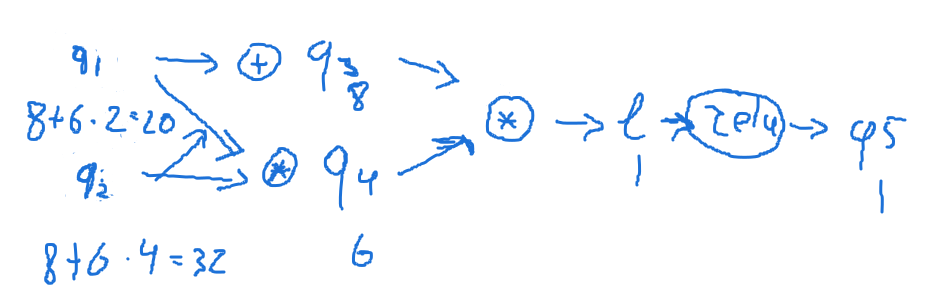

In [8]:
#повторное присваивание 
items = []
y1 = Element(2)
items.append(y1)
y2 = Element(-3)
items.append(y2)
y3 = y1 + y2
items.append(y3)
y1 = y3 * y2
items.append(y1)

y1.backward()
elements = [y1,y2,y3]
for i in elements:
    print(i)

print(items)

[ Element(data=2, grad=0),  Element(data=-3, grad=0),  Element(data=-1, grad=0),  Element(data=3, grad=0)]
 Element(data=3, grad=1)
 Element(data=-3, grad=-4)
 Element(data=-1, grad=-3)
[ Element(data=2, grad=-3),  Element(data=-3, grad=-4),  Element(data=-1, grad=-3),  Element(data=3, grad=1)]


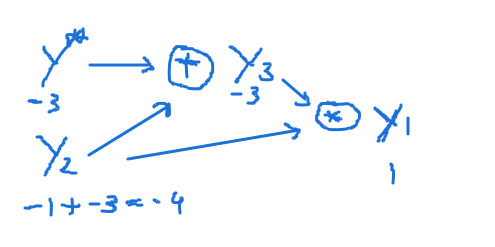